## Load metro data

In [2]:
import sys
import json
import logging
import argparse
import networkx as nx
import matplotlib.pyplot as plt

## Load metro data

In [3]:
def load_metro(path):
    with open(path, 'r') as f:
        metro = json.load(f)
        return metro

## Build graph

In [4]:
def build_metro_graph(metro):
    """
    Build a metro station map like this:
    {
        "鼓楼大街": {"安德里北街", "积水潭", "安定门", "什刹海"},
        "苹果园": {"古城"}
    }
    """
    try:
        lines = metro['lines']
        stations = {}
        for line in lines:
            prev_st = ''
            nodes = line['stations']
            for node in nodes:
                st_name = node['station_name']
                if st_name not in stations:
                    stations[st_name] = set()

                if prev_st != '':
                    stations[st_name].add(prev_st)
                    stations[prev_st].add(st_name)

                prev_st = st_name

        return stations
    except Exception:
        print('metro file format not correct')

## draw graph

In [5]:
def draw_graph(graph):
    gph = nx.Graph(graph)
    nx.draw(gph, with_labels=True, node_size=2, font_size='8')

## Beijing metro

In [6]:
bj_metro = load_metro('../project/metro_exchange/bj.metro.json')
bj_graph = build_metro_graph(bj_metro)
print(bj_graph)

{'苹果园': {'古城'}, '古城': {'八角游乐园', '苹果园'}, '八角游乐园': {'古城', '八宝山'}, '八宝山': {'八角游乐园', '玉泉路'}, '玉泉路': {'五棵松', '八宝山'}, '五棵松': {'玉泉路', '万寿路'}, '万寿路': {'公主坟', '五棵松'}, '公主坟': {'军事博物馆', '万寿路', '西钓鱼台', '莲花桥'}, '军事博物馆': {'公主坟', '木樨地', '白堆子', '北京西站'}, '木樨地': {'军事博物馆', '南礼士路'}, '南礼士路': {'木樨地', '复兴门'}, '复兴门': {'长椿街', '西单', '阜成门', '南礼士路'}, '西单': {'宣武门', '灵境胡同', '天安门西', '复兴门'}, '天安门西': {'天安门东', '西单'}, '天安门东': {'王府井', '天安门西'}, '王府井': {'天安门东', '东单'}, '东单': {'灯市口', '王府井', '建国门', '崇文门'}, '建国门': {'朝阳门', '东单', '永安里', '北京站'}, '永安里': {'建国门', '国贸'}, '国贸': {'金台夕照', '大望路', '永安里', '双井'}, '大望路': {'四惠', '金台路', '九龙山', '国贸'}, '四惠': {'四惠东', '大望路'}, '四惠东': {'四惠', '高碑店'}, '西直门': {'大钟寺', '积水潭', '新街口', '动物园', '车公庄'}, '积水潭': {'西直门', '鼓楼大街'}, '鼓楼大街': {'安定门', '积水潭', '什刹海', '安德里北街'}, '安定门': {'雍和宫', '鼓楼大街'}, '雍和宫': {'安定门', '北新桥', '和平里北街', '东直门'}, '东直门': {'柳芳', '雍和宫', '三元桥', '东四十条'}, '东四十条': {'朝阳门', '东直门'}, '朝阳门': {'东四', '东大桥', '建国门', '东四十条'}, '北京站': {'建国门', '崇文门'}, '崇文门': {'前门', '东单', '磁器口', '北京站'}, '前门': {'和平门', '崇文门'}, '和平门': 

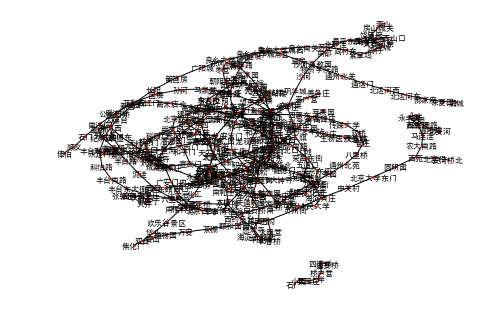

In [7]:
draw_graph(bj_graph)

## Shanghai metro

In [10]:
sh_metro = load_metro('../project/metro_exchange/sh.metro.json')
sh_graph = build_metro_graph(sh_metro)
print(sh_graph)

{'莘庄': {'春申路', '外环路'}, '外环路': {'莘庄', '莲花路'}, '莲花路': {'锦江乐园', '外环路'}, '锦江乐园': {'上海南站', '莲花路'}, '上海南站': {'石龙路', '漕宝路', '锦江乐园'}, '漕宝路': {'上海南站', '桂林公园', '上海体育馆', '龙漕路'}, '上海体育馆': {'漕宝路', '徐家汇', '宜山路'}, '徐家汇': {'上海游泳馆', '交通大学', '宜山路', '衡山路', '上海体育馆', '肇嘉浜路'}, '衡山路': {'徐家汇', '常熟路'}, '常熟路': {'静安寺', '肇嘉浜路', '衡山路', '陕西南路'}, '陕西南路': {'嘉善路', '常熟路', '新天地', '上海图书馆', '黄陂南路', '南京西路'}, '黄陂南路': {'人民广场', '陕西南路'}, '人民广场': {'新闸路', '曲阜路', '大世界', '南京东路', '黄陂南路', '南京西路'}, '新闸路': {'汉中路', '人民广场'}, '汉中路': {'新闸路', '曲阜路', '自然博物馆', '江宁路', '上海火车站', '南京西路'}, '上海火车站': {'中潭路', '宝山路', '汉中路', '中山北路'}, '中山北路': {'上海火车站', '延长路'}, '延长路': {'上海马戏城', '中山北路'}, '上海马戏城': {'延长路', '汶水路'}, '汶水路': {'上海马戏城', '彭浦新村'}, '彭浦新村': {'共康路', '汶水路'}, '共康路': {'彭浦新村', '通河新村'}, '通河新村': {'呼兰路', '共康路'}, '呼兰路': {'共富新村', '通河新村'}, '共富新村': {'宝安公路', '呼兰路'}, '宝安公路': {'共富新村', '友谊西路'}, '友谊西路': {'富锦路', '宝安公路'}, '富锦路': {'友谊西路'}, '徐泾东': {'虹桥火车站'}, '虹桥火车站': {'龙柏新村', '虹桥2号航站楼', '诸光路', '徐泾东'}, '虹桥2号航站楼': {'淞虹路', '虹桥火车站', '虹桥1号航站楼'}, '淞虹路': {'北新泾', '虹桥2号航站楼'}, '北

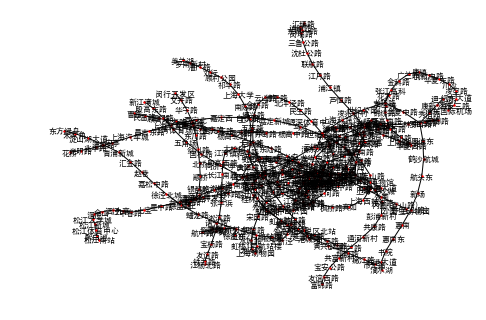

In [11]:
draw_graph(sh_graph)

## Shenzhen metro

In [12]:
sz_metro = load_metro('../project/metro_exchange/sz.metro.json')
sz_graph = build_metro_graph(sz_metro)
print(sz_graph)

{'罗湖站': {'国贸站'}, '国贸站': {'老街站', '罗湖站'}, '老街站': {'国贸站', '大剧院站', '红岭站', '晒布站'}, '大剧院站': {'燕南站', '湖贝站', '老街站', '科学馆站'}, '科学馆站': {'华强路站', '大剧院站'}, '华强路站': {'科学馆站', '岗厦站'}, '岗厦站': {'华强路站', '会展中心站'}, '会展中心站': {'购物公园站', '福民站', '市民中心站', '岗厦站'}, '购物公园站': {'石厦站', '会展中心站', '福田站', '香蜜湖站'}, '香蜜湖站': {'购物公园站', '车公庙站'}, '车公庙站': {'福田站', '竹子林站', '红树湾南站', '下沙站', '农林站', '上沙站', '香梅站', '香蜜湖站'}, '竹子林站': {'车公庙站', '侨城东站'}, '侨城东站': {'华侨城站', '竹子林站'}, '华侨城站': {'世界之窗站', '侨城东站'}, '世界之窗站': {'侨城北站', '红树湾站', '白石洲站', '华侨城站'}, '白石洲站': {'高新园站', '世界之窗站'}, '高新园站': {'深大站', '白石洲站'}, '深大站': {'高新园站', '桃园站'}, '桃园站': {'深大站', '大新站'}, '大新站': {'桃园站', '鲤鱼门站'}, '鲤鱼门站': {'前海湾站', '大新站'}, '前海湾站': {'临海站', '宝安站', '南山站', '新安站', '鲤鱼门站'}, '新安站': {'前海湾站', '宝安中心站'}, '宝安中心站': {'新安站', '翻身站', '宝体站', '宝华站'}, '宝体站': {'坪洲站', '宝安中心站'}, '坪洲站': {'宝体站', '西乡站'}, '西乡站': {'坪洲站', '固戍站'}, '固戍站': {'西乡站', '后瑞站'}, '后瑞站': {'固戍站', '机场东站'}, '机场东站': {'后瑞站'}, '赤湾站': {'蛇口港站'}, '蛇口港站': {'海上世界站', '赤湾站'}, '海上世界站': {'水湾站', '蛇口港站'}, '水湾站': {'海上世界站', '东角头站'}, '东角头站': {'水湾站

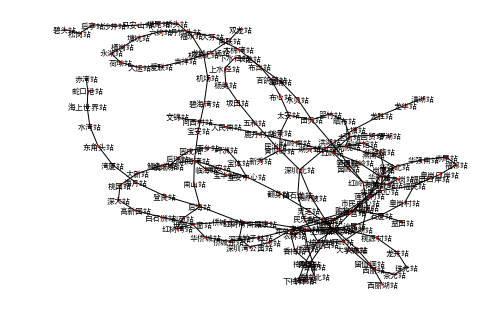

In [13]:
draw_graph(sz_graph)

## Guangzhou metro

In [14]:
gz_metro = load_metro('../project/metro_exchange/gz.metro.json')
gz_graph = build_metro_graph(gz_metro)
print(gz_graph)

{'西朗': {'鹤洞', '菊树', '坑口'}, '坑口': {'西朗', '花地湾'}, '花地湾': {'芳村', '坑口'}, '芳村': {'黄沙', '花地湾'}, '黄沙': {'文化公园', '芳村', '长寿路', '如意坊'}, '长寿路': {'黄沙', '陈家祠'}, '陈家祠': {'西门口', '长寿路'}, '西门口': {'公园前', '陈家祠'}, '公园前': {'西门口', '海珠广场', '农讲所', '纪念堂'}, '农讲所': {'烈士陵园', '公园前'}, '烈士陵园': {'农讲所', '东山口'}, '东山口': {'杨箕', '区庄', '烈士陵园', '东湖'}, '杨箕': {'动物园', '五羊邨', '体育西路', '东山口'}, '体育西路': {'石牌桥', '体育中心', '珠江新城', '林和西', '杨箕'}, '体育中心': {'广州东站', '体育西路'}, '广州东站': {'体育中心', '燕塘', '林和西'}, '广州南站': {'石壁'}, '石壁': {'广州南站', '谢村', '会江'}, '会江': {'石壁', '南浦'}, '南浦': {'洛溪', '会江'}, '洛溪': {'南洲', '南浦'}, '南洲': {'洛溪', '东晓南'}, '东晓南': {'江泰路', '南洲'}, '江泰路': {'东晓南', '昌岗'}, '昌岗': {'晓港', '江泰路', '江南西', '宝岗大道'}, '江南西': {'昌岗', '市二宫'}, '市二宫': {'海珠广场', '江南西'}, '海珠广场': {'一德路', '市二宫', '北京路', '公园前'}, '纪念堂': {'越秀公园', '公园前'}, '越秀公园': {'广州火车站', '纪念堂'}, '广州火车站': {'西村', '三元里', '小北', '越秀公园'}, '三元里': {'广州火车站', '飞翔公园'}, '飞翔公园': {'白云公园', '三元里'}, '白云公园': {'白云文化广场', '飞翔公园'}, '白云文化广场': {'白云公园', '萧岗'}, '萧岗': {'白云文化广场', '江夏'}, '江夏': {'萧岗', '黄边'}, '黄边': {'嘉禾望岗', '江夏'

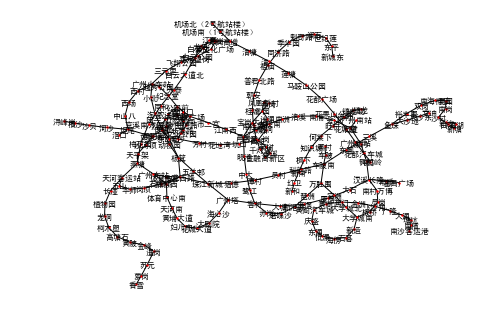

In [15]:
draw_graph(gz_graph)